#### Problem Statement #

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether  the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.
  
An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.  

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. 

For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue. 
Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.



#####
###### Variable	         Definition
###### id	 -->                Unique ID for the customer
###### Gender  --> 	         Gender of the customer
###### Age    -->              Age of the customer
###### Driving_License	-->     0 : Customer does not have DL, 1 : Customer already has DL
###### Region_Code	    -->     Unique code for the region of the customer
###### Previously_Insured -->	 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
###### Vehicle_Age	   -->      Age of the Vehicle 
###### Vehicle_Damage  -->     1 : Customer got his/her vehicle damaged in the past.
######                         0 : Customer didn't get his/her vehicle damaged in the past.
###### Annual_Premium  -->	     The amount customer needs to pay as premium in the year
###### Policy_Sales_Channel --> Anonymised Code for the channel of outreaching to the customer 
######                          ie. Different Agents, Over Mail, Over Phone, In Person, etc.
######                          Vintage	Number of Days, Customer has been associated with the company
###### Response	            -->  1 :  Customer is interested, 0 : Customer is not interested.


### Import Librabries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [34]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv('data/test.csv')
sample = pd.read_csv('data/sample_submission.csv')

In [35]:
train.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


Pre-Processing Section
- Undertsanding the data shape </br>
- Inforrmation of the meta-data </br>
- Checking for null values </br>
- Checking for duplicate values </br>
- Drop unneccessary columns </br>
- Fill missing values </br>
- Seperate Numerical and categorical Columns </br>

In [37]:
#dimensions of the given data (rows and columns)
train.shape, test.shape, sample.shape

((381109, 12), (127037, 11), (127037, 2))

In [38]:
# Columns info and data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [39]:
# Columns dtypes - (3 -catgorical columns, 9 - numerical columns)
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [40]:
# null values
train.isna().sum()
# No null values

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [41]:
# no null values
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [42]:
# to check the data count
train['Response'].value_counts(normalize =True)*100
### Unbalanced data set

Response
0    87.743664
1    12.256336
Name: proportion, dtype: float64

In [43]:
#### EDA - Exploratory Data Analysis Section

[Text(0, 0, '334399'), Text(0, 0, '46710')]

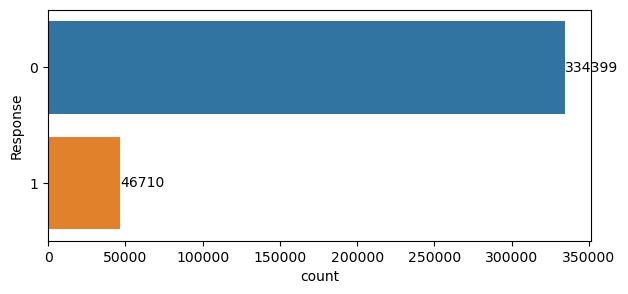

In [44]:
fig, ax = plt.subplots(figsize=(7,3))
response = sns.countplot(y ='Response' , data = train, ax =ax)
response.bar_label(response.containers[0])

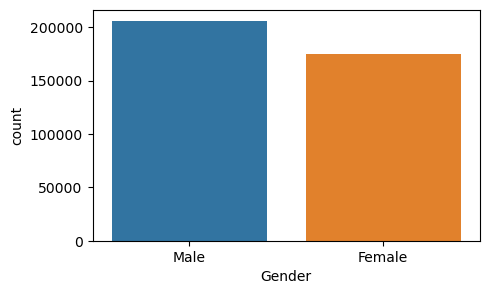

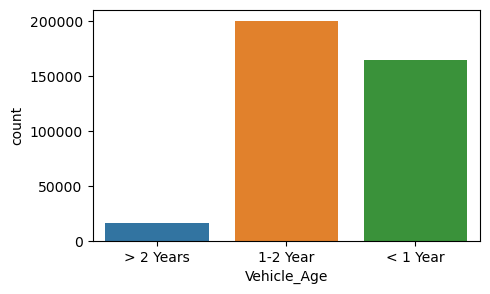

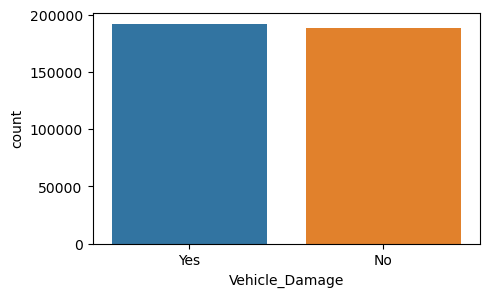

In [45]:
for col in train.select_dtypes(include='object').columns:
    plt.figure(figsize=(5,3))
    sns.countplot(x=train[col])
    plt.show()

# Inference the categorical column are not having huge difference in Gender and Vehile damage
# and vehicle damage is  has 3 categories
#1-2 years - 1st Maximum value
#< 1 year  - 2nd Maxmimum values
#> 2 years  - very less when compared to other two

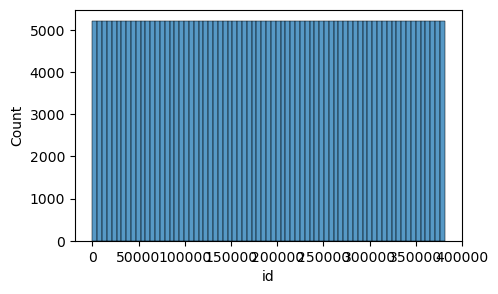

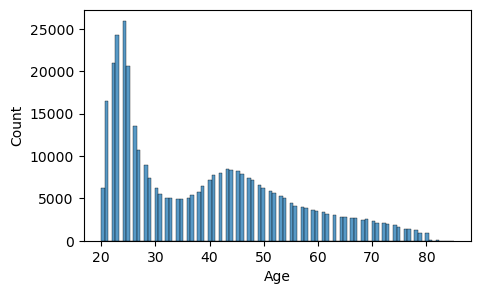

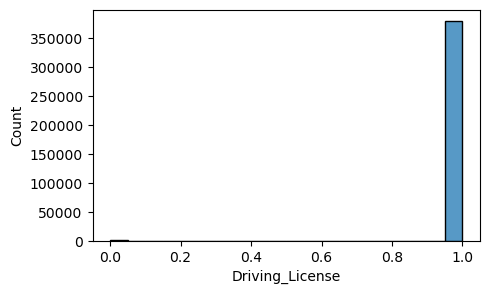

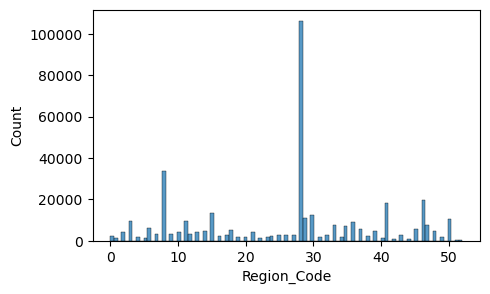

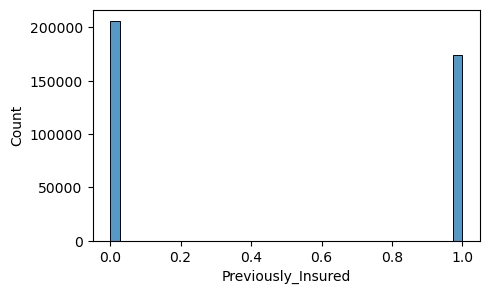

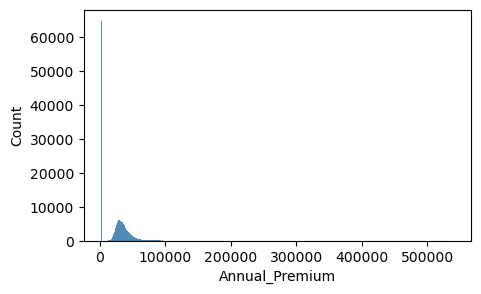

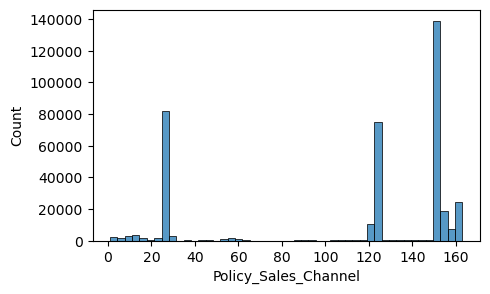

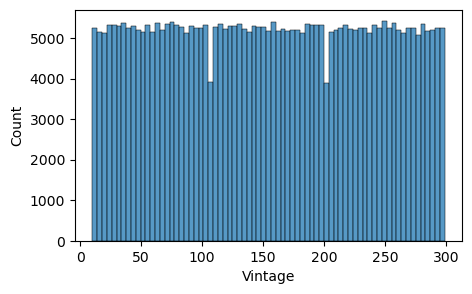

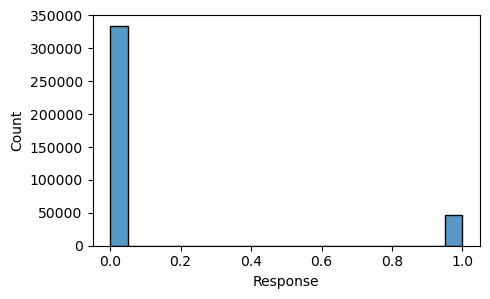

In [46]:
for col in train.select_dtypes(exclude='object').columns:
    plt.figure(figsize=(5,3))
    sns.histplot(x=train[col])
    plt.show()


 # region code 29 is having maximum records
    # there are less data when the age increases
    # 35-45 age there is an increase in records
    #channel -148 has the highest no of records

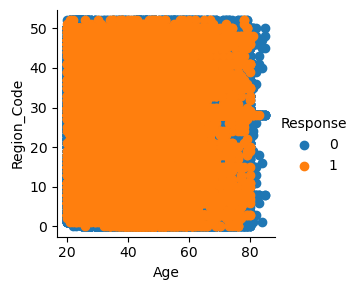

In [55]:
sns.FacetGrid(train, hue ='Response').map(plt.scatter,"Age","Region_Code").add_legend()
plt.show()
#people more than 80 years old dosent get a license

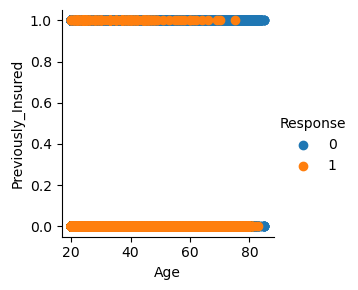

In [57]:
sns.FacetGrid(train, hue ='Response').map(plt.scatter,"Age","Previously_Insured").add_legend()
plt.show()
# 

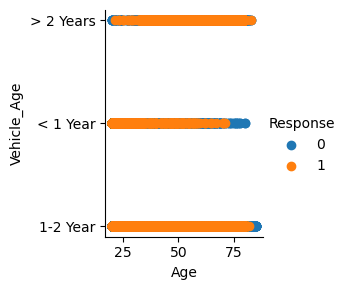

In [58]:
sns.FacetGrid(train, hue ='Response').map(plt.scatter,"Age","Vehicle_Age").add_legend()
plt.show()

# with age increaseing  and vehicle age get older most of them get an isurance
# aged persons who bu an new car doesnt take insurance

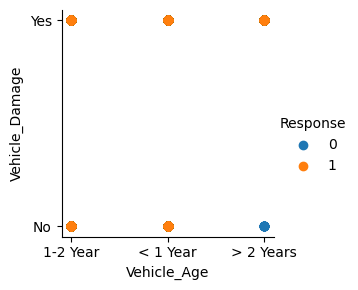

In [59]:
sns.FacetGrid(train, hue ='Response').map(plt.scatter,"Vehicle_Age","Vehicle_Damage").add_legend()
plt.show()

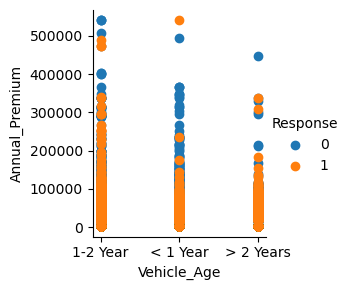

In [60]:
sns.FacetGrid(train, hue ='Response').map(plt.scatter,"Vehicle_Age","Annual_Premium").add_legend()
plt.show()

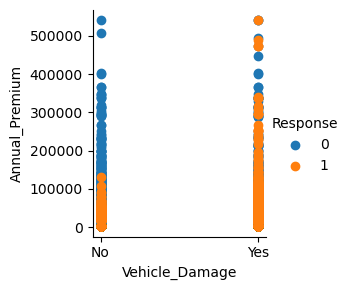

In [61]:
sns.FacetGrid(train, hue ='Response').map(plt.scatter,"Vehicle_Damage","Annual_Premium").add_legend()
plt.show()

# With No Vehicle damage and premium more than Rs.12000 - there is no insurance taken

<Axes: xlabel='Vintage', ylabel='Annual_Premium'>

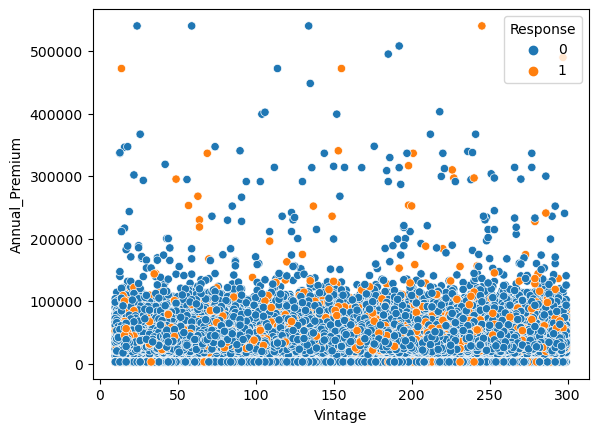

In [63]:
sns.scatterplot(x="Vintage",
                    y="Annual_Premium", hue ="Response",
                    data =  train )

In [ ]:

plt.title("Pair plot")
sns.pairplot(data = train)

In [ ]:
#Remove unwanted columns
tgt_cols = ['Response']
ign_cols = ['id']
cat_cols = train.select_dtypes(include=['object']).columns
num_cols = train.select_dtypes(exclude=['object']).columns

In [ ]:
print(cat_cols , num_cols) 

In [ ]:
num_cols = train.select_dtypes(exclude =['object']).drop(columns = tgt_cols + ign_cols).columns

In [ ]:
train[num_cols]